<p>In this project, I'll be exploring various Machine Learning techniques on an Automobile Dataset, sourced online from EDX-IBM Analyzing data with Python Course, to determine the best technique(s) applicable to the data to gauge what features of a vehicle affect its price.</p>
<p>Data source: "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"</p></p>
<p>Data type: csv</p>

In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['scikit-learn'])

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 

<p>Loading the data into th DataFrame</p>

In [4]:
data = pd.read_csv('auto.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<p>To better describe the data, we introduce a header. This information is available at:</p><p>https://archive.ics.uci.edu/ml/datasets/Automobile.</p>

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
data.columns = headers
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<p>
    
The data has the mark "?" for the missing values. We need to transform this into a value the computer can synthesize. In this case,
    the numpy nan value</p>

In [6]:
data.replace('?', np.nan, inplace=True)
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<p>
      
We use the info method in dataframe object to display some information about the data i.e the non null count and data types of the columns
</p>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

<p>
    
We can now transform select columns into their respective data types. This makes future computations easier and an integral part of data cleaning.
</p>

In [8]:
data[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]] = data[["normalized-losses", "bore", "stroke",
                                                                                         "horsepower", "peak-rpm", "price"]].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

<p>

We can create a new dataframe from our existing dataframe consisting of boolean values for the rows of the columns according to whether the row is empty or not. If a row is empty, it takes the value "True". We then get the counts.
</p>

In [9]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print()

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

<p>

For the columns that have numerical datatypes, we can use mean, mode(frequency), or median values to replace the null values. Here, we replace with the mean
</p>

In [10]:
data[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']].describe()

,normalized-losses,bore,stroke,horsepower,peak-rpm
count,164.000000,201.000000,201.000000,203.000000,203.000000
mean,122.000000,3.329751,3.255423,104.256158,5125.369458
std,35.442168,0.273539,0.316717,39.714369,479.334560
min,65.000000,2.540000,2.070000,48.000000,4150.000000
25%,94.000000,3.150000,3.110000,70.000000,4800.000000
50%,115.000000,3.310000,3.290000,95.000000,5200.000000
75%,150.000000,3.590000,3.410000,116.000000,5500.000000
max,256.000000,3.940000,4.170000,288.000000,6600.000000


In [11]:
col = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for i in col:
    data[i].replace(np.nan, data[i].mean(), inplace=True)

<p>

For the columns that have object data types, we can use mode(frequency) to replace the null values. Simply because its the most likely to occur.
</p>

In [12]:
data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [13]:
data['num-of-doors'] = data['num-of-doors'].replace(np.nan, data['num-of-doors'].value_counts().idxmax())

<p>

Since the "price" column is what we want to predict, any row in that column that has a null value cannot be used for prediction| and needs to be dropped entirely.
</p>

In [14]:
data.dropna(subset='price', inplace=True)

<p>

Since we dropped some rows, we need to reset the index for the resulting dataframe
</p>

In [15]:
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis. The grouping is meant to check if there's any relationships between price and the value of horsepower.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. The low number of unique values compared to the number of items in the column(201) warrants this grouping. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>

In [16]:
bins = np.linspace(min(data['horsepower']), max(data['horsepower']), 4)
category = ['Low', 'Medium', 'High']
data['horsepower_binned'] = pd.cut(data['horsepower'], bins=bins, labels=category, include_lowest=True)
data[['horsepower', 'horsepower_binned']].head(20)

,horsepower,horsepower_binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
9,101.0,Low


In [17]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    float64 
 2   make               201 non-null    object  
 3   fuel-type          201 non-null    object  
 4   aspiration         201 non-null    object  
 5   num-of-doors       201 non-null    object  
 6   body-style         201 non-null    object  
 7   drive-wheels       201 non-null    object  
 8   engine-location    201 non-null    object  
 9   wheel-base         201 non-null    float64 
 10  length             201 non-null    float64 
 11  width              201 non-null    float64 
 12  height             201 non-null    float64 
 13  curb-weight        201 non-null    int64   
 14  engine-type        201 non-null    object  
 15  num-of-cylinders   201 non-null    object  
 16  engine-s

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>
<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.</p>

<p>

Now we can do a preliminary check on some of the columns that have correlations with the 'price' column
</p>

For columns of numerical datatype:

In [19]:
data.corr()['price'] #Checks on the columns that are of numerical type

<ipython-input-19-3a6c2d9bfa71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['price'] #Checks on the columns that are of numerical type


symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082269
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
Name: price, dtype: float64

We can also get their respective regression plots

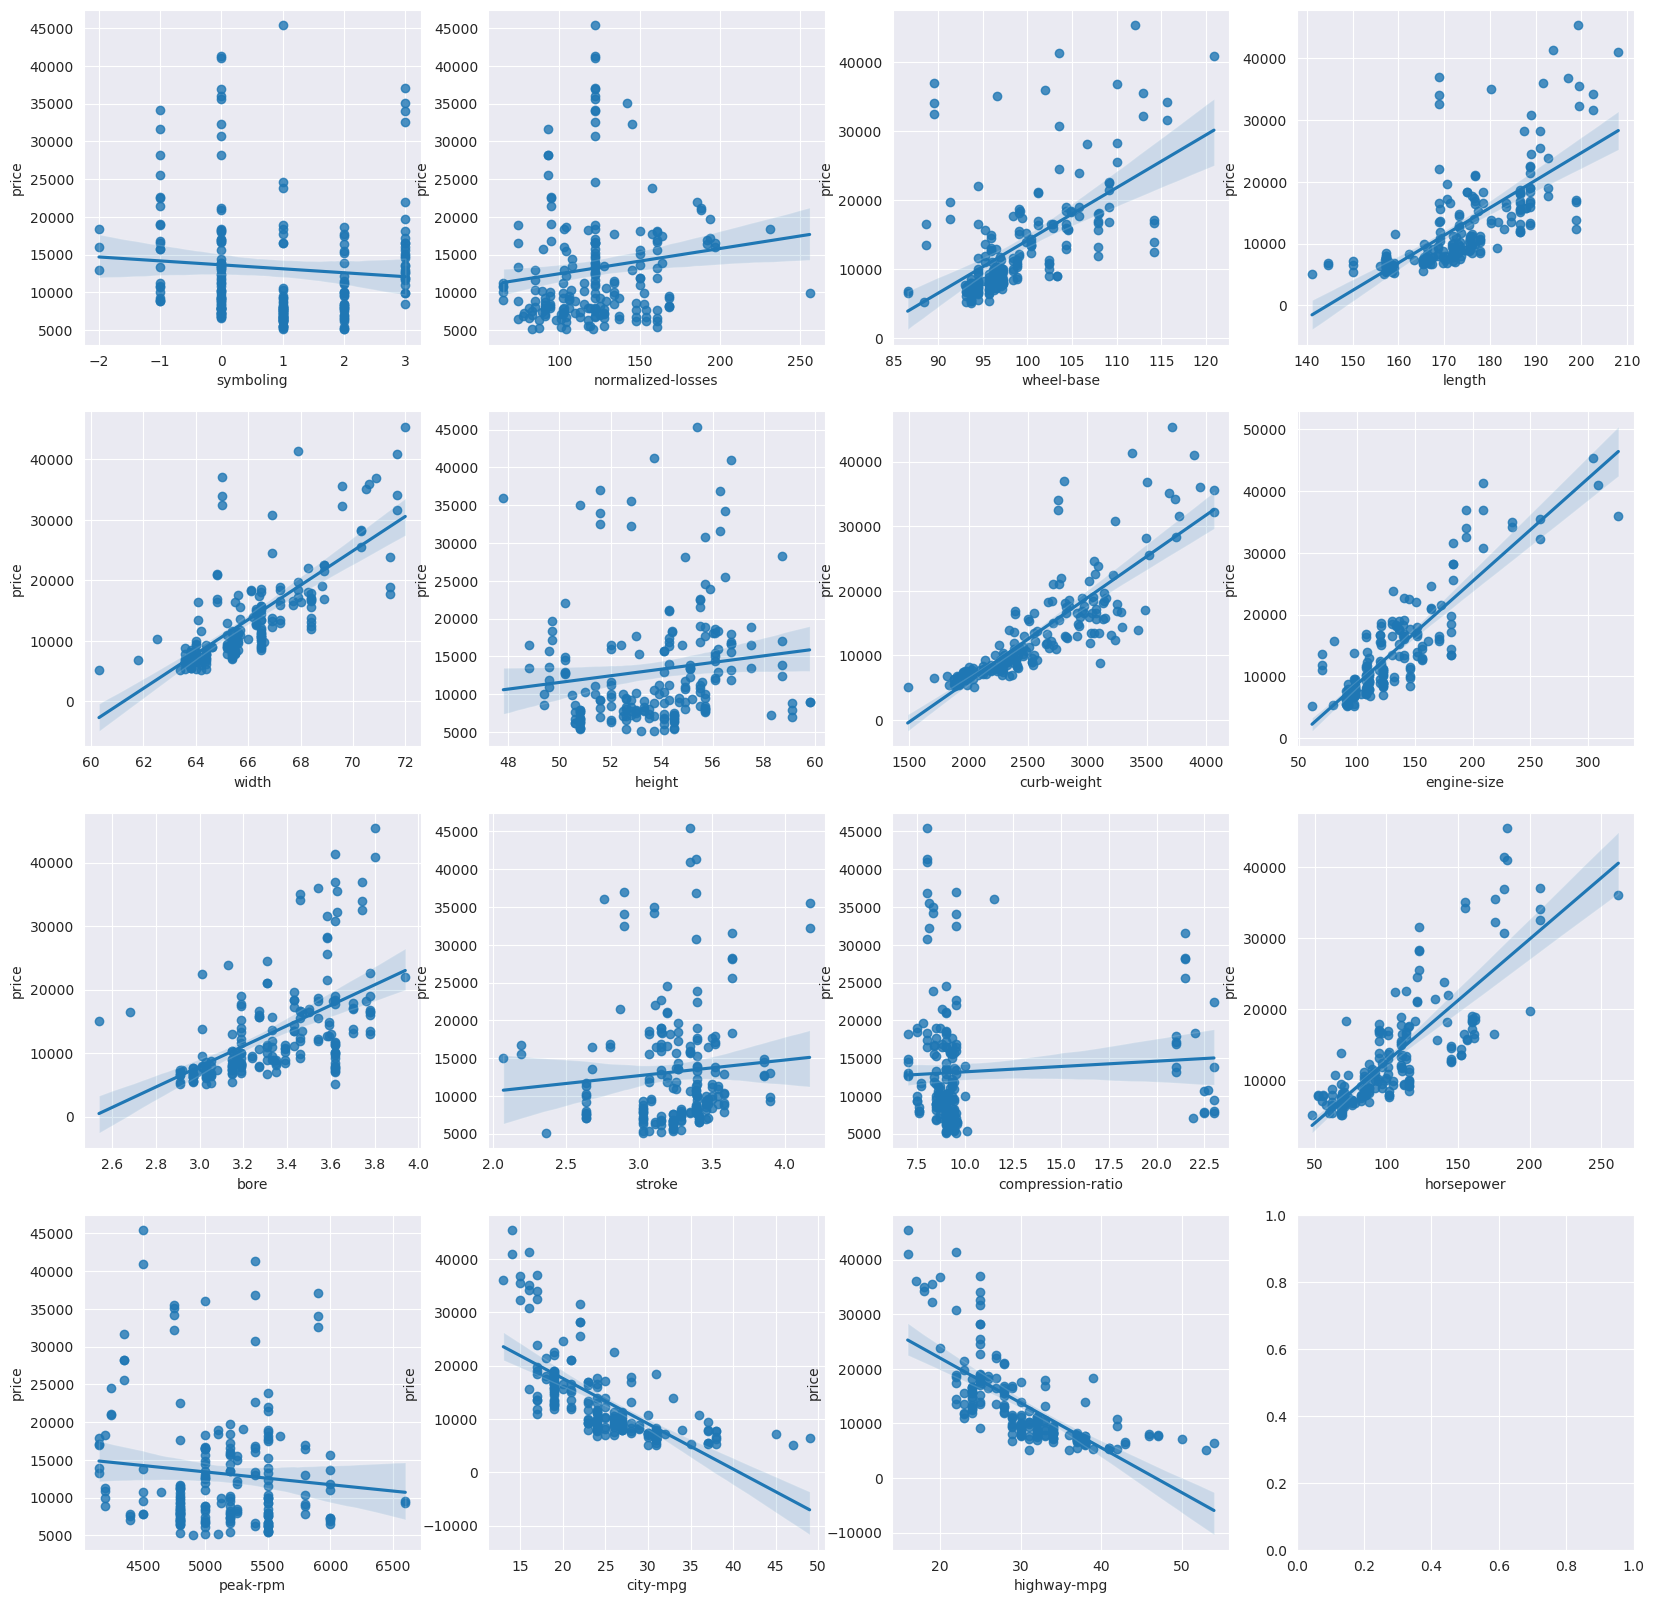

In [20]:
num_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_columns.remove('price')
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
r = 0
c = 0
for column in num_columns:
    sns.regplot(x=column, y='price', data=data, ax=axes[r, c])
    c += 1
    if c == 4:
        r += 1
        c = 0

<p>We have now observed those numerical columns that have either a positive or negative strong or weak linear correlations with the "price" column. Columns 'wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horse-power', 'city-mpg', and 'highway-mpg' show evidence of strong relationships and will be used in further analysis</p>    

<p>For the columns that contain <b>categorical data</b> of object datatype, we could use boxplots to do a preliminary check. Categorical data consists of variables that describe a 'characteristic' of a data unit.   
</p>
<p>
<ol>
    <li>Compare the respective medians of each box plot. If the median line of a box plot lies outside of the box of a comparison box plot, then there is likely to be a difference between the groups.</li>
   <li>Compare the interquartile ranges (that is, the box lengths) to examine how the data is dispersed between each sample. The longer the box, the more dispersed the data. The smaller, the less dispersed the data.</li>
    <li>Look for signs of symmetry. If the data do not appear to be symmetric, does each sample show the same kind of asymmetry?</li>
</ol>
</p>
<p>Here, we are interested in comparing the median lines to get those categorical data that could have an impact on price</p>

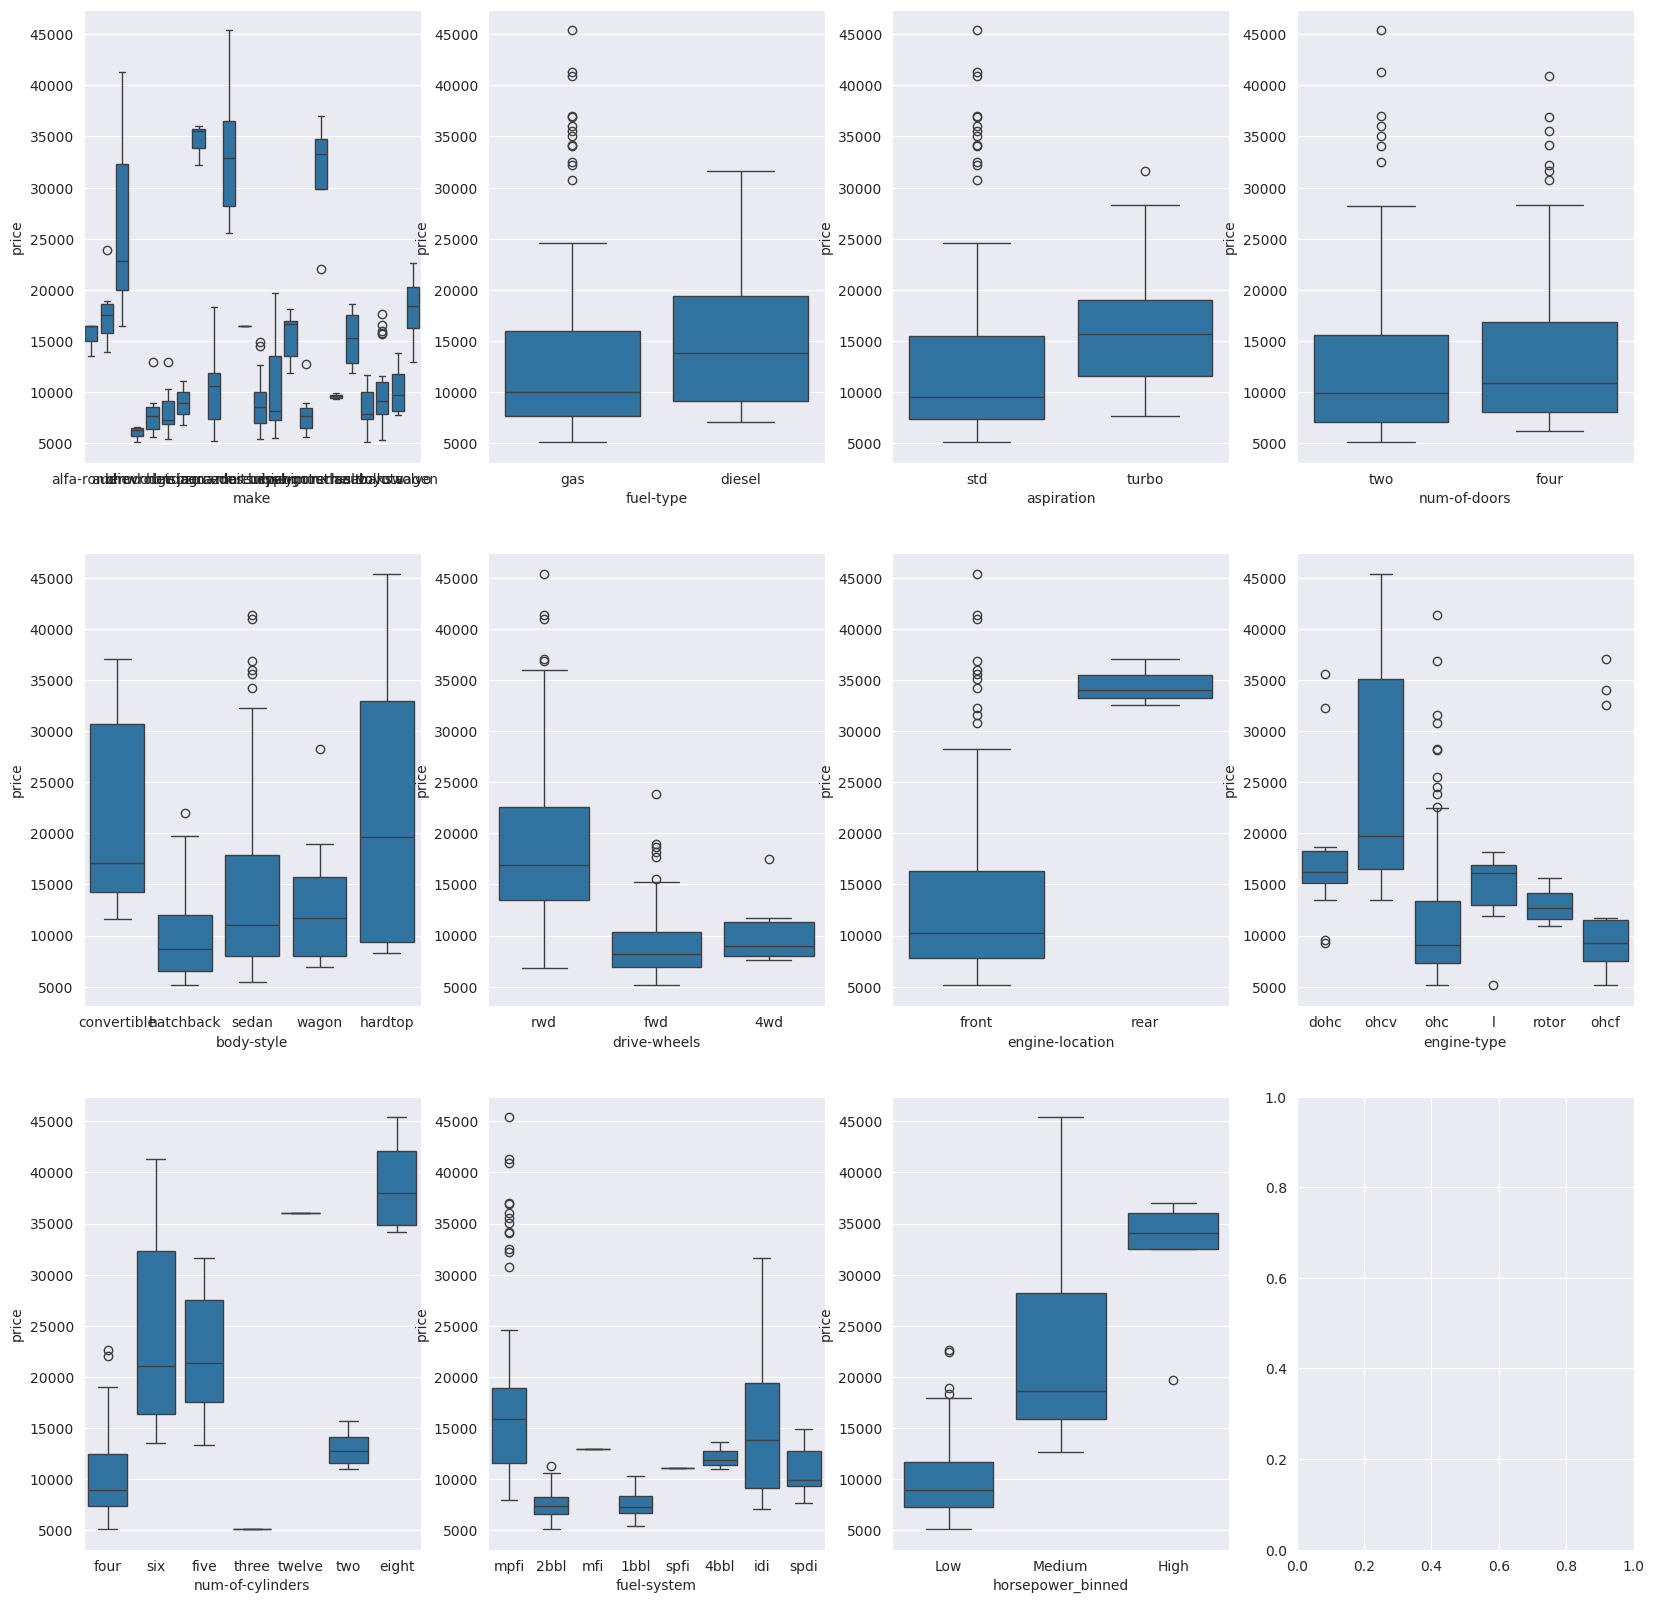

In [21]:
cat_columns = data.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
r = 0
c = 0
for column in cat_columns:
    sns.boxplot(x=column, y='price', data=data, ax=axes[r, c])
    c += 1
    if c == 4:
        r += 1
        c = 0

<p>We see that categorical data type columns 'body-style', 'fuel-type', 'num-of-doors', and 'fuel-system' don't have significantly different groups of boxlots. </p>
<p>Columns 'make', 'aspiration', 'drive-wheels', 'engine-location', 'engine-type', and 'num-of-cylinders' have significantly different groupings and hence will need further analysis</p>
<p>

We can check the count of values in these columns to find out if they are representative enough of the entire data set
</p>

In [22]:
cat_data = data[['make', 'aspiration', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders']]
for column in cat_data.columns.values.tolist():
    print(column)
    print(cat_data[column].value_counts())
    print()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

aspiration
std      165
turbo     36
Name: aspiration, dtype: int64

drive-wheels
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

engine-location
front    198
rear       3
Name: engine-location, dtype: int64

engine-type
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine-type, dtype: int64

num-of-cylinders
four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64



<p>We believe that columns 'aspiration', 'drive-wheels', and 'engine-type' have just the numbers for meaningful analysis. This theory will be subject to further analysis as we move along.</p>
<p>We ignore the rest of the categorical data columns as we are not able to draw meaningful conclusions given the limited data. For example, after examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Aspiration</li>
    <li>Drive-wheels</li>
    <li>Engine-type</li>
</ul>

<p>We now want to find out if the relationships of the variables we have found to affect 'price' are statistically significant. Here,we use P-values</p>
<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [23]:
from scipy import stats
p_test_columns = ['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg']
for column in p_test_columns:
    p_coef, p_val = stats.stats.pearsonr(data[column], data['price'])
    print(f"{column:>15}: p-value is {p_val:.70f}")
    print()

<ipython-input-23-e4e4399657f3>:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  p_coef, p_val = stats.stats.pearsonr(data[column], data['price'])


     wheel-base: p-value is 0.0000000000000000000807648827073233780257597408918041746137092519184698

         length: p-value is 0.0000000000000000000000000000080164774661588708468439084707818206954771

          width: p-value is 0.0000000000000000000000000000000000000920033551048049274473992023951584

    curb-weight: p-value is 0.0000000000000000000000000000000000000000000000000000218957723889396539

    engine-size: p-value is 0.0000000000000000000000000000000000000000000000000000000000000009265492

           bore: p-value is 0.0000000000000000804918948393538447348809668970425650808687737208617363

     horsepower: p-value is 0.0000000000000000000000000000000000000000000000063690574282595598252184

       city-mpg: p-value is 0.0000000000000000000000000000232113206556723574163718502315361997562244

    highway-mpg: p-value is 0.0000000000000000000000000000001749547114447557416108776538921905595227



We see that all the p-values are less than 0.001. This provides strong evidence that correlation relationships between the variables and 'price' column are statistically significant 

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>
<p>ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>a) Taking the 'drive-wheels' column, we have:</p>

In [24]:
drive_wheels_anova = data[['drive-wheels', 'price']].groupby('drive-wheels')
drive_wheels_anova.get_group('rwd') #sample result 

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
9,rwd,16430.0
10,rwd,16925.0
...,...,...
196,rwd,16845.0
197,rwd,19045.0
198,rwd,21485.0
199,rwd,22470.0


In [25]:
from scipy import stats
f_val, p_val = stats.f_oneway(drive_wheels_anova.get_group('rwd')['price'],
                              drive_wheels_anova.get_group('fwd')['price'], 
                              drive_wheels_anova.get_group('4wd')['price'])
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 67.95406500780398 , P = 3.3945443577151245e-23


From the Anova results, we see that the f-statistic is large, this indicates that the means within the different groups within the 'drive-wheels' column have different means. The very small p-value shows that the differences in means are very significant.

<p>b) Taking the 'aspiration' column, we have:</p>

In [26]:
aspiration_anova = data[['aspiration', 'price']].groupby('aspiration')
aspiration_anova.get_group('std') #Sample result

,aspiration,price
0,std,13495.0
1,std,16500.0
2,std,16500.0
3,std,13950.0
4,std,17450.0
...,...,...
191,std,13415.0
192,std,15985.0
193,std,16515.0
196,std,16845.0


In [27]:
from scipy import stats
f_val, p_val = stats.f_oneway(aspiration_anova.get_group('turbo')['price'], 
                              aspiration_anova.get_group('std')['price']) 

print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 6.631286341771228 , P = 0.010745853841804088


From the Anova results, we see that the f-statistic is fairly small, this indicates that the means within the different groups within the 'aspiration' column have slightly different means. Even though the small p-value shows that the differences in means are significant, we ignore this variable because the differences in means are quite small.

<p>c) Taking the 'engine-type' column, we have:</p>

In [28]:
engine_type_anova = data[['engine-type', 'price']].groupby('engine-type')
engine_type_anova.get_group('l') #Sample result

,engine-type,price
17,l,5151.0
104,l,11900.0
105,l,13200.0
106,l,12440.0
107,l,13860.0
108,l,15580.0
109,l,16900.0
110,l,16695.0
111,l,17075.0
112,l,16630.0


In [29]:
from scipy import stats
f_val, p_val = stats.f_oneway(engine_type_anova.get_group('dohc')['price'], engine_type_anova.get_group('ohcv')['price'], 
                              engine_type_anova.get_group('ohc')['price'], engine_type_anova.get_group('l')['price'], 
                              engine_type_anova.get_group('rotor')['price'], engine_type_anova.get_group('ohcf')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 9.845110955850453 , P = 2.0865492749735665e-08


From the Anova results, we see that the f-statistic is fairly small, this indicates that the means within the different groups within the 'engine-type' column have slightly different means. Even though the small p-value shows that the differences in means are significant, we ignore this variable because the differences in means are quite small.

<p>All the variables that we found were important in predicting 'price' have passed the statistical significance tests, we now can begiin building our model</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis, since regression analysis accepts only numbers.
</p>
<b>Example</b>
<p>
    We see the column "drive-wheels" has three unique values: "4wd", "fwd", or "rwd". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "drive-wheels" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of engine type. 
</p>


In [30]:
dummy = pd.get_dummies(data['drive-wheels'])
dummy

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
196,0,0,1
197,0,0,1
198,0,0,1
199,0,0,1


We rename the column names for easy reference

In [31]:
dummy.rename(columns={'4wd':'drive-wheels-4wd', 'fwd':'drive-wheels-fwd', 'rwd':'drive-wheels-rwd'}, inplace=True)
dummy

,drive-wheels-4wd,drive-wheels-fwd,drive-wheels-rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
196,0,0,1
197,0,0,1
198,0,0,1
199,0,0,1


<p>We then join the data df to the newly created dummies df</p>

In [32]:
data = pd.concat([data, dummy], axis=1) 
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_binned,drive-wheels-4wd,drive-wheels-fwd,drive-wheels-rwd
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,Low,0,0,1
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,Low,0,0,1
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,Medium,0,0,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,Low,0,1,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,Low,1,0,0


<p>We can now create a new dataframe consisting of only the variables that we will use for further analysis.</p>

In [33]:
#We now create a copy of a slice of the data Dataframe 
model_data = data[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','horsepower', 
                   'city-mpg', 'highway-mpg', 'drive-wheels-4wd', 'drive-wheels-fwd', 'drive-wheels-rwd', 'price']].copy()

#We change the datatypes of the new dataframe columns to conform with the rest
model_data = model_data.astype('float64')
model_data

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,drive-wheels-4wd,drive-wheels-fwd,drive-wheels-rwd,price
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,0.0,0.0,1.0,13495.0
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,0.0,0.0,1.0,16500.0
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0,0.0,0.0,1.0,16500.0
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0,0.0,1.0,0.0,13950.0
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0,1.0,0.0,0.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,109.1,188.8,68.9,2952.0,141.0,3.78,114.0,23.0,28.0,0.0,0.0,1.0,16845.0
197,109.1,188.8,68.8,3049.0,141.0,3.78,160.0,19.0,25.0,0.0,0.0,1.0,19045.0
198,109.1,188.8,68.9,3012.0,173.0,3.58,134.0,18.0,23.0,0.0,0.0,1.0,21485.0
199,109.1,188.8,68.9,3217.0,145.0,3.01,106.0,26.0,27.0,0.0,0.0,1.0,22470.0


<p>Some questions we want to ask when we have built the model are:</p>

<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>
<p>In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

<h2>1. Linear Regression and Multiple Linear Regression</h2>

<h4>A) Linear Regression</h4>

<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$

<b>Linear Function</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

<h4>Let's load the modules for linear regression:</h4>


<h4>How could "highway-mpg" help us predict car price?</h4>

<p>For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.</p>

In [34]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() #Create the linear regression model object

X = model_data[['highway-mpg']]
Y = model_data['price']

lm.fit(X,Y) #Fit the linear model using highway-mpg

Yhat_LR = lm.predict(X)
Yhat_LR[0:5] #Output of the first 5 prediction values of the model

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>What is the value of the intercept a?</h4>

In [35]:
lm.intercept_

38423.30585815743

<h4>What is the value of the slope b?</h4>

In [36]:
lm.coef_

array([-821.73337832])

<p>The negative slope shows that as the value of 'highway-mpg' increases, the value of 'price' decreases</p>

<h3>What is the final estimated linear model we get?</h3>
As we saw above, we should get a final linear model with the structure:
$$
Yhat = a + b  X
$$
Plugging in the actual values we get:
<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


<p></p>

<h4>B) Multiple Linear Regression</h4>

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
and\ so\ on
$$

$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
and\ so\ on
$$

The equation is given by:
$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4 + ....
$$

<p>From above analysis we know that good predictors of price could be:</p>
Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [37]:
Z = model_data[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','horsepower', 
                'city-mpg', 'highway-mpg', 'drive-wheels-4wd', 'drive-wheels-fwd', 'drive-wheels-rwd']]
Y = model_data['price']

lm.fit(Z, Y) #Fit the linear model using the above-mentioned variables
Yhat_MLR = lm.predict(Z)
Yhat_MLR[0:5] #Output of the first 5 prediction values of the model

array([13314.98091907, 13314.98091907, 21305.50422136, 10997.38615213,
       16149.61806364])

<p>The intercept and coefficients are:</p>

In [38]:
Z = model_data[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','horsepower', 
                'city-mpg', 'highway-mpg', 'drive-wheels-4wd', 'drive-wheels-fwd', 'drive-wheels-rwd']]
Y = model_data['price']

lm.fit(Z, Y)
print("The intercept is ", lm.intercept_)
print()
print("The coefficient array is", lm.coef_)

The intercept is  -56827.22288876001

The coefficient array is [ 5.48523217e+01 -2.16271401e+01  8.86423422e+02  1.25282684e-01
  9.01741580e+01 -2.56545356e+03  5.20165084e+01 -2.21120902e+02
  2.46137239e+02  6.34929500e+02 -1.83240162e+03  1.19747212e+03]


<h2>Model Evaluation Using Visualization</h2>
<p>Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization. We can do this by using the visualization package, seaborn.</p>
<h3>Regression Plot</h3>
<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>
<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>
<p>The following shows the plots of individual simple linear regression models of our target variables</p>

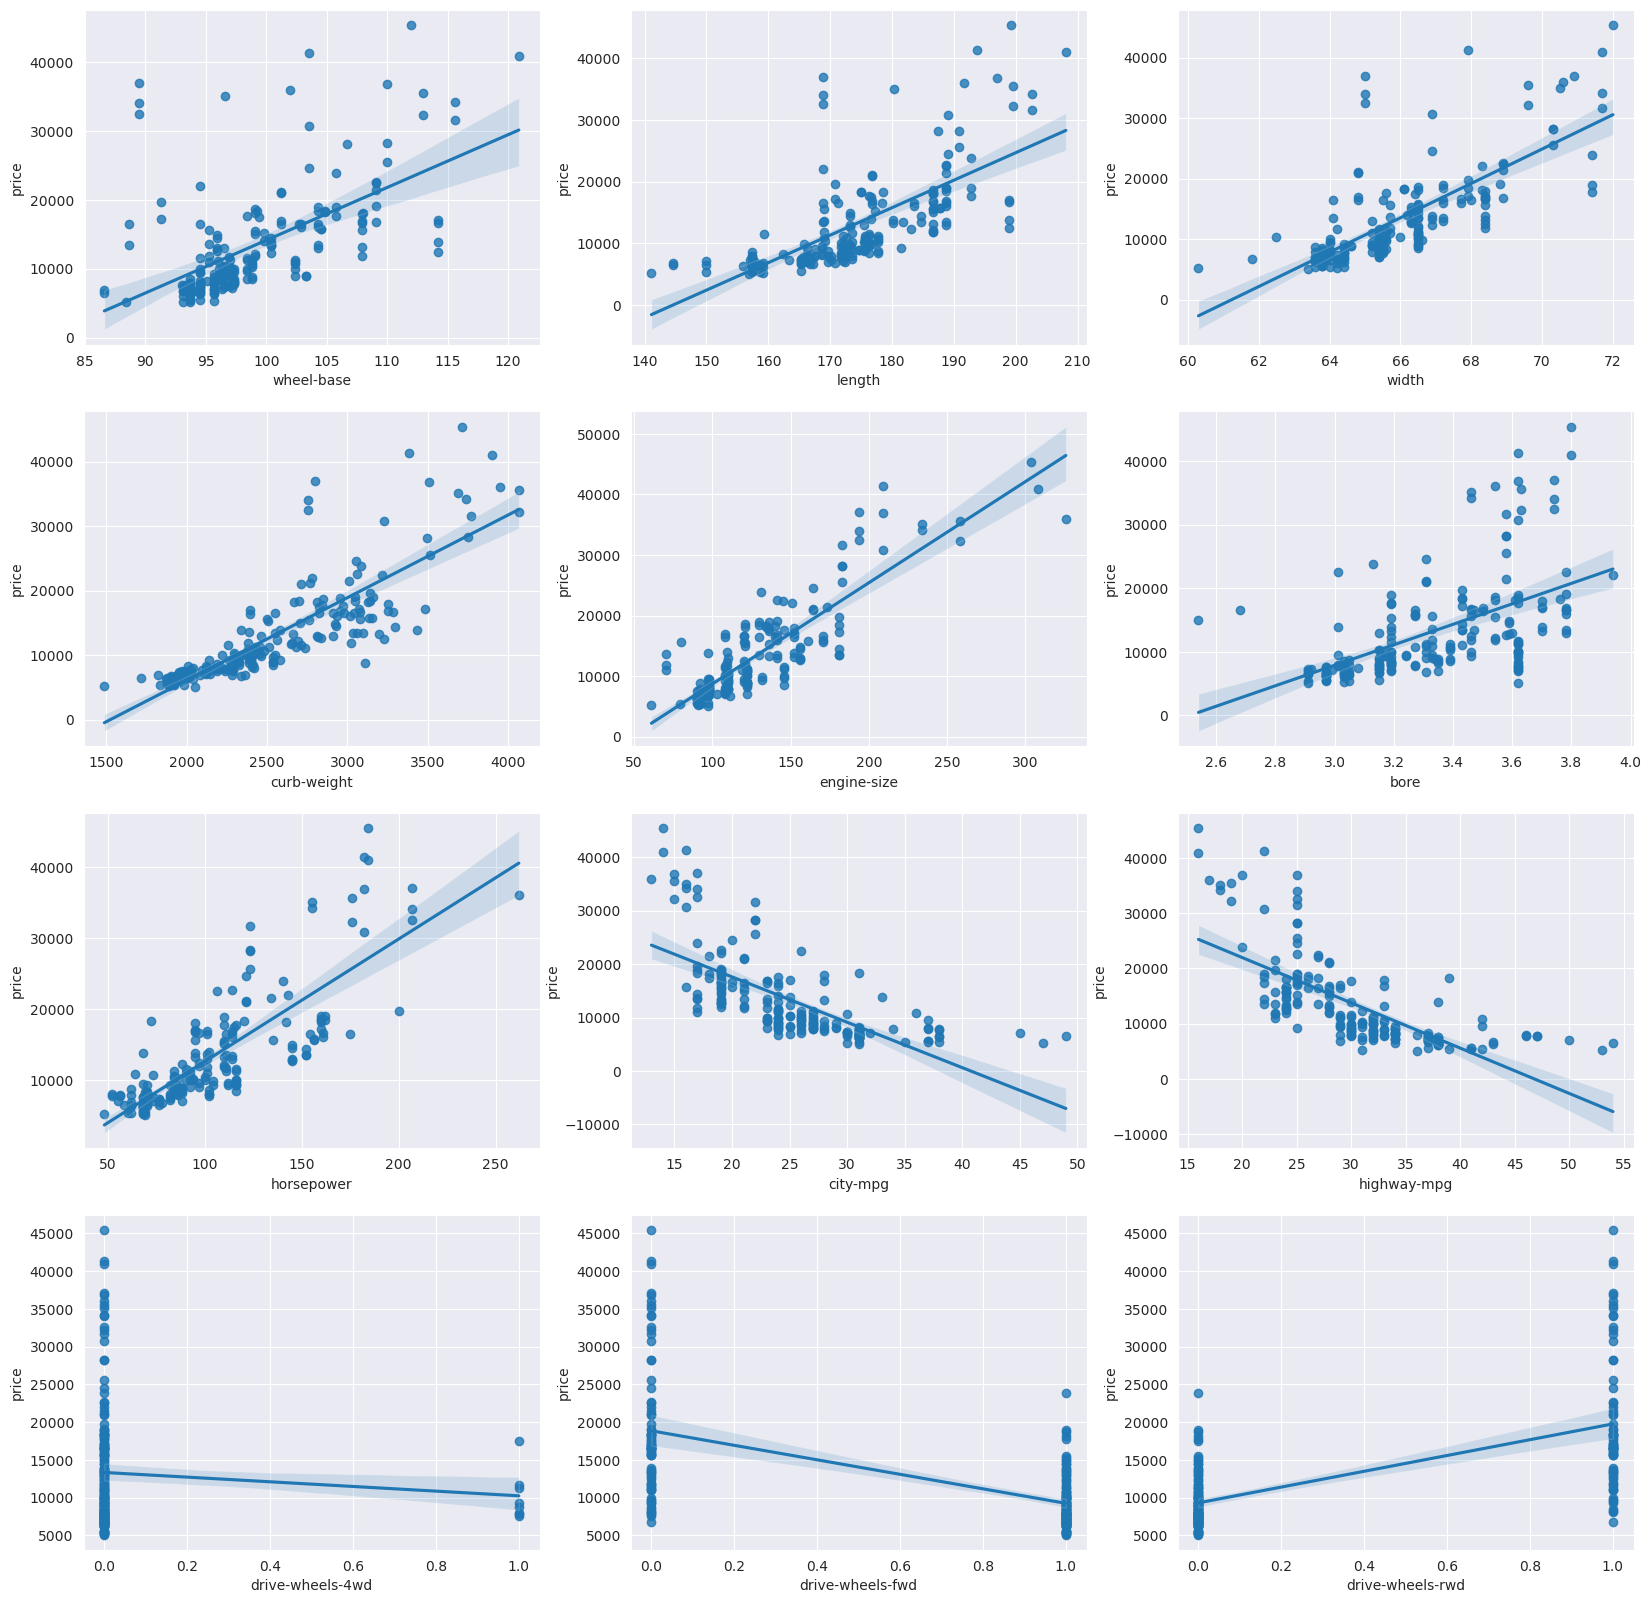

In [39]:
reg_plots = model_data[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 
                         'city-mpg', 'highway-mpg', 'drive-wheels-4wd', 'drive-wheels-fwd', 'drive-wheels-rwd']]

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
r = 0
c = 0
for column in reg_plots:
    sns.regplot(x=column, y='price', data=model_data, ax=axes[r, c])
    c += 1
    if c == 3:
        r += 1
        c = 0

<p>We can see from these plots that price is negatively correlated to highway-mpg, city-mpg, drive-wheels-4wd, and drive-wheels-fwd since the regression slope is negative. The rest of the variables have positive regression slopes.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. From the plots, it is not clear what linear model is the best, but the plots show the direction of the relationships with price.

Let's compare these plots to the regression plot of "peak-rpm".</p>

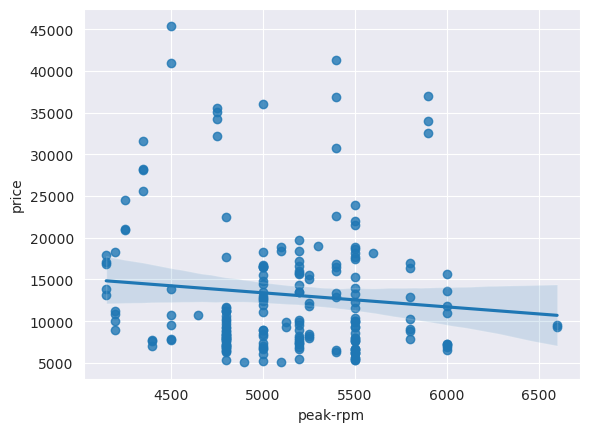

In [40]:
sns.regplot(x="peak-rpm", y="price", data=data)
plt.show()

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


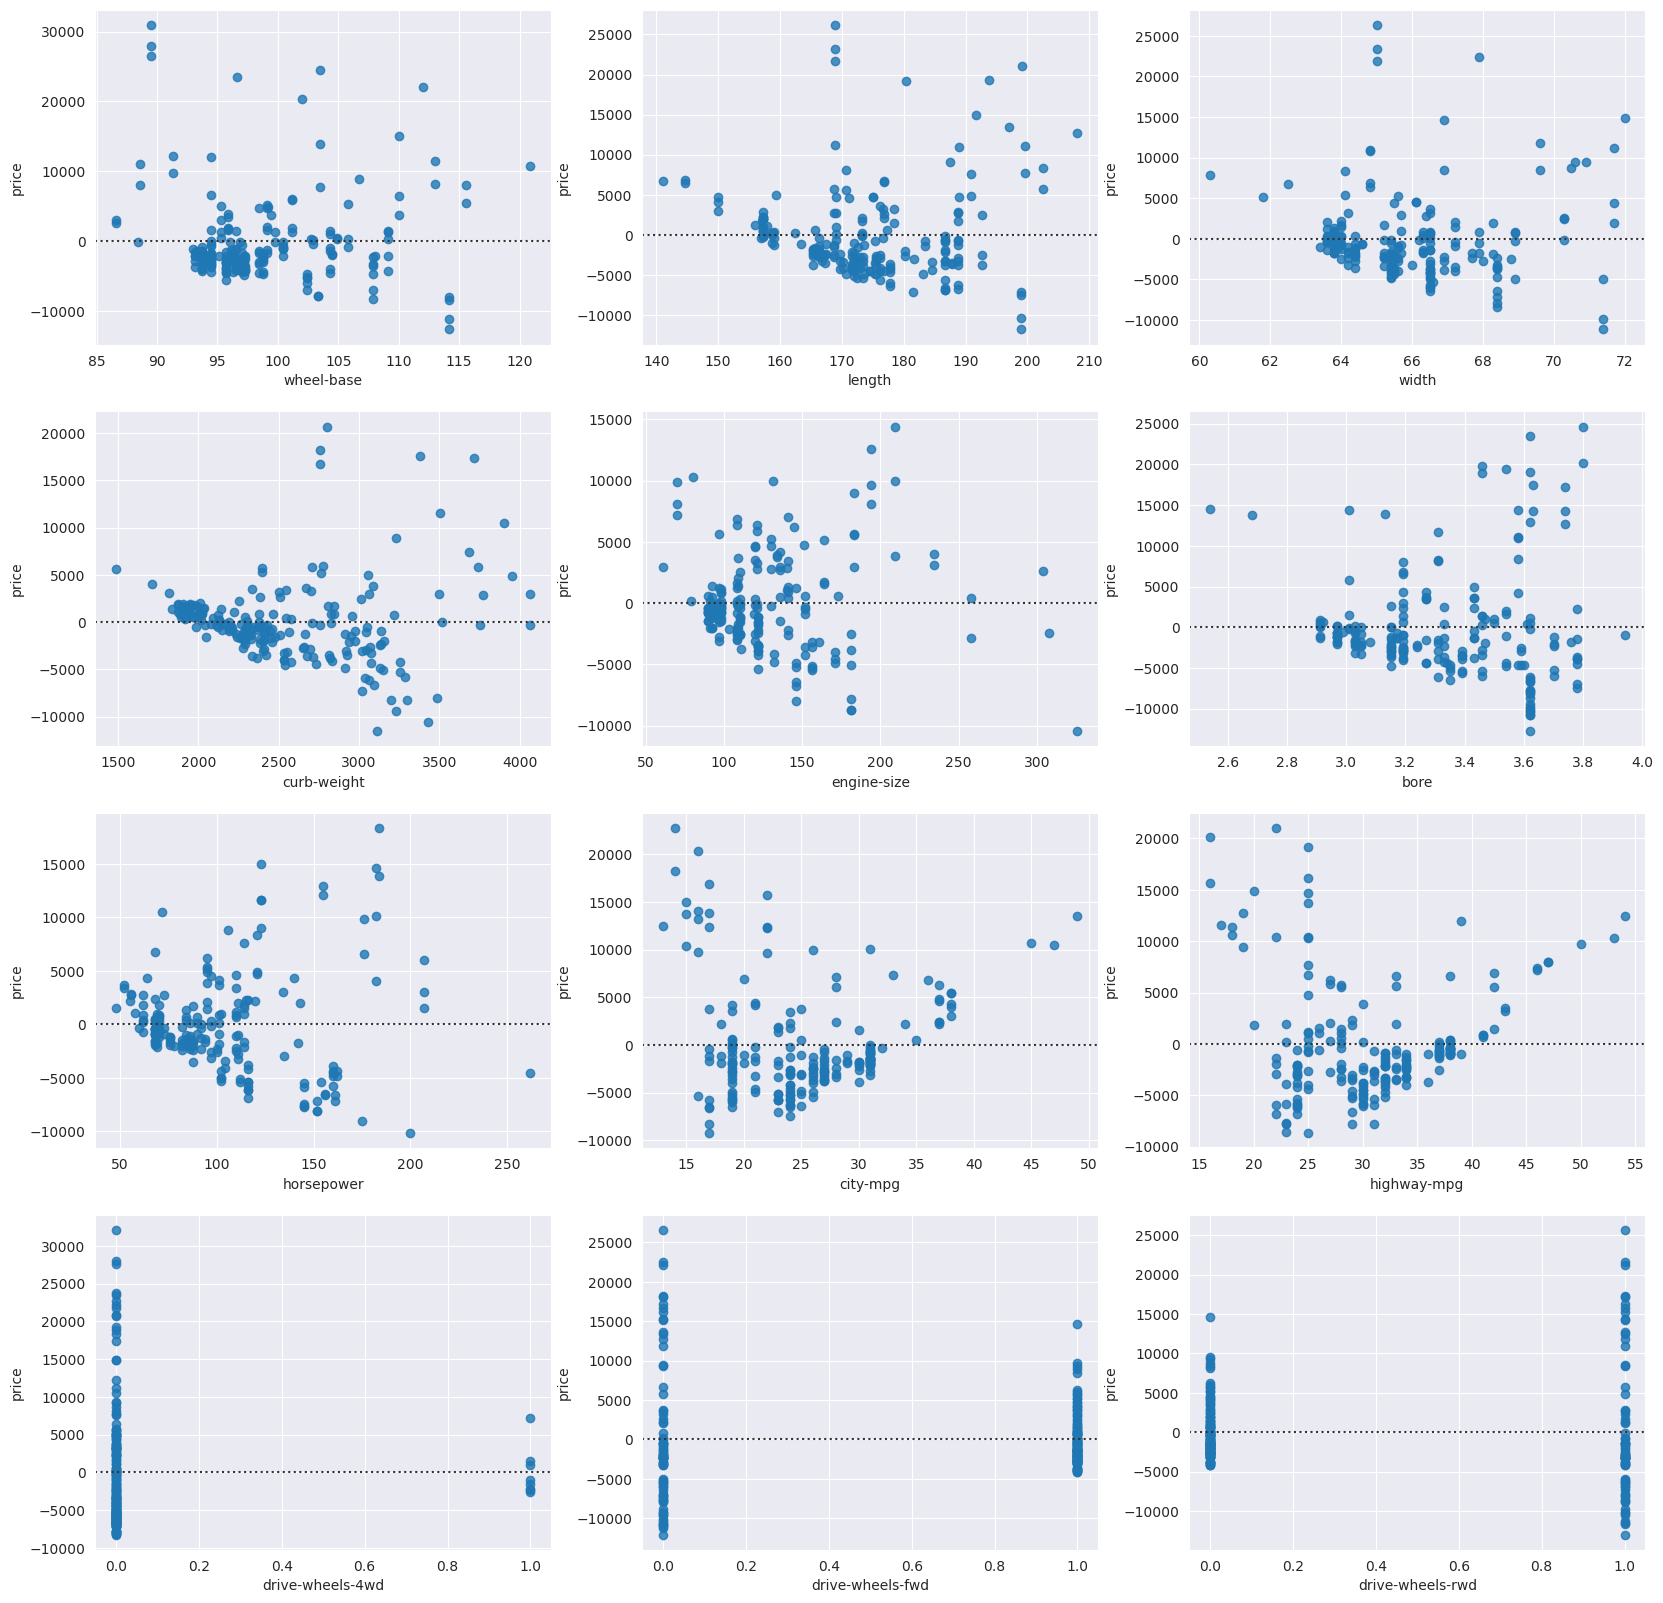

In [41]:
residual_plots = model_data[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 
                         'city-mpg', 'highway-mpg', 'drive-wheels-4wd', 'drive-wheels-fwd', 'drive-wheels-rwd']]

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
r = 0
c = 0
for column in residual_plots:
    sns.residplot(x=column, y='price', data=model_data, ax=axes[r, c])
    c += 1
    if c == 3:
        r += 1
        c = 0

<p>Clearly we can observe that the residuals in the residual plots of the individual variables are not random. This can mean that a non-linear model might be more appropriate, that is, fitting.</p>

<p>How do we visualize a model for <b>Multiple Linear Regression</b>? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>kernel density estimate plot(kdeplot)</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

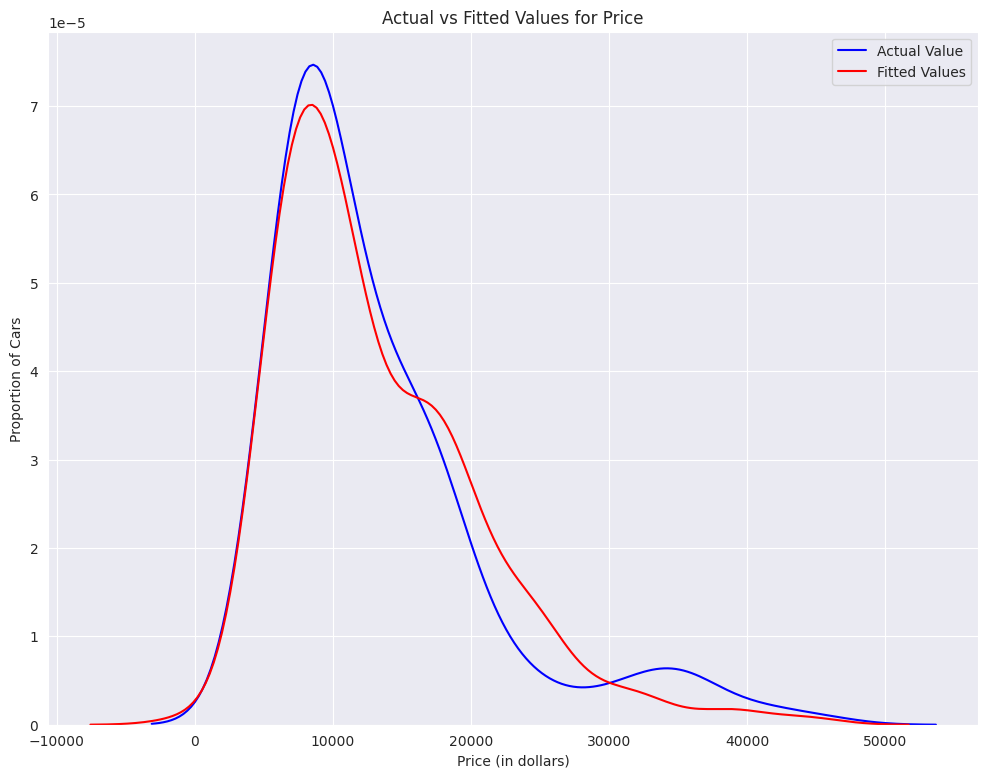

In [42]:
plt.figure(figsize=(12, 9))
sns.kdeplot(model_data['price'], color="b", label="Actual Value")
sns.kdeplot(Yhat_MLR, color="r", label="Fitted Values")


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()

plt.show()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h2>3. Polynomial Regression and Pipelines</h2>
<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>
<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$
<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>

<h2>Pipeline</h2>
<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>
<p>We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor. We input the list as an argument to the pipeline constructor.</p>
<p>Then, we can normalize the data,  perform a transform and fit the model simultaneously using the pipeline.</p>

In [43]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

Z = model_data[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','horsepower', 
                'city-mpg', 'highway-mpg', 'drive-wheels-4wd', 'drive-wheels-fwd', 'drive-wheels-rwd']]
Y = model_data['price']
Input = [('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=5, include_bias=False)), ('model', LinearRegression())]

pipe = Pipeline(Input)
pipe.fit(Z, Y)    
Yhat_poly = pipe.predict(Z)
Yhat_poly[0:5] #Prints first five predicted values

array([15010.09692383, 15010.09692383, 16498.11865234, 13934.51373291,
       17459.19732666])

<p>We can find the optimal degree of the polynomial, that gives the highest coefficient of determination ratio, ie percentage of our model that explains the target data</p>

In [44]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Z = model_data[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore','horsepower', 
                'city-mpg', 'highway-mpg', 'drive-wheels-4wd', 'drive-wheels-fwd', 'drive-wheels-rwd']]
Y = model_data['price']
max_r2 = 0

for degree in range(2, 6):
    Input = [('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=degree, include_bias=False)), ('model', LinearRegression())]
    pipe = Pipeline(Input)
    pipe.fit(Z, Y)    
    Yhat_poly = pipe.predict(Z)
    r2 = r2_score(Y, Yhat_poly)
    if r2 > max_r2:
        max_r2 = r2 
        opt_degree = degree
        
print('Degree:', opt_degree,'  ','r2 value:', max_r2)

Degree: 5    r2 value: 0.9987281849692922


We can then use kde plots to visualize this prediction

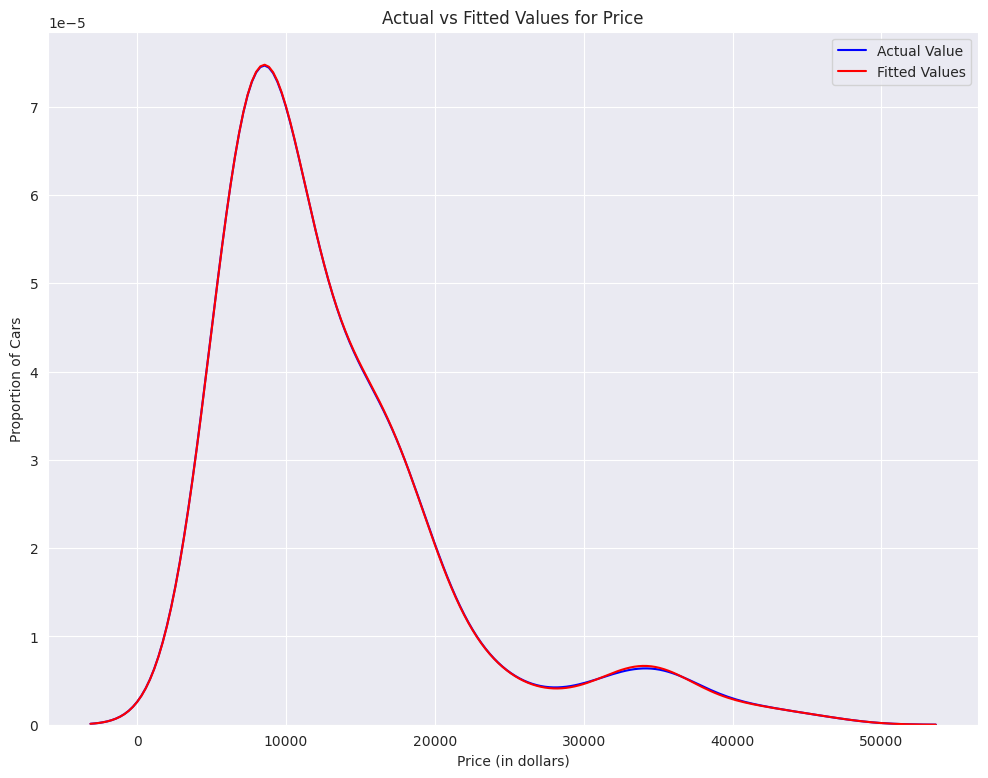

In [45]:
plt.figure(figsize=(12, 9))
sns.kdeplot(model_data['price'], color="b", label="Actual Value")
sns.kdeplot(Yhat_poly, color="r", label="Fitted Values")


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()

plt.show()

<p>This actually results in a much better curve fit, visually, than the kde plot for MLR</p>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h3>a) Linear Model</h3>
<p>For the linear models, we can loop through the columns to find the column with the geeatest R squared value</p>

In [46]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
h = 0
for column in model_data.iloc[:, 0:-1].columns:
    X = model_data[[column]]
    Y = model_data['price']
    lm.fit(X, Y)
    r2_lm = lm.score(X, Y)
    if r2_lm > h:
        h = r2_lm
        col = column

print('Column with highest r2 value is:', col, 'with r2 value of:', h)

Column with highest r2 value is: engine-size with r2 value of: 0.7609686443622008


<p>The MSE of column 'engine-size' is</p>

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = model_data[['engine-size']]
Y = model_data['price']

lm = LinearRegression()
lm.fit(X, Y)

Yhat = lm.predict(X)
MSE_lm = mean_squared_error(Y, Yhat)

print('The MSE of the linear model using column "engine-size" is:', MSE_lm)

The MSE of the linear model using column "engine-size" is: 15021126.02517414


<h3>b) MLR</h3>

In [48]:
print('The R squared value for the MLR is:', r2_score(Y, Yhat_MLR), 'with a MSE of:', mean_squared_error(Y, Yhat_MLR))

The R squared value for the MLR is: 0.8336285205788684 with a MSE of: 10455059.139464179


<h3>c) Polynomial Model</h3>

In [49]:
print('The R squared value for the Polynomial Model is:', r2_score(Y, Yhat_poly), 'with a MSE of:', mean_squared_error(Y, Yhat_poly))

The R squared value for the Polynomial Model is: 0.9987281849692922 with a MSE of: 79922.9615963904


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>
From the results above, we cam clearly see that the polynomial model is far ahead of the other models.

score: [ 0.84635985  0.79864417  0.43720571 -0.25615166] 

r2 0.6694778546341473


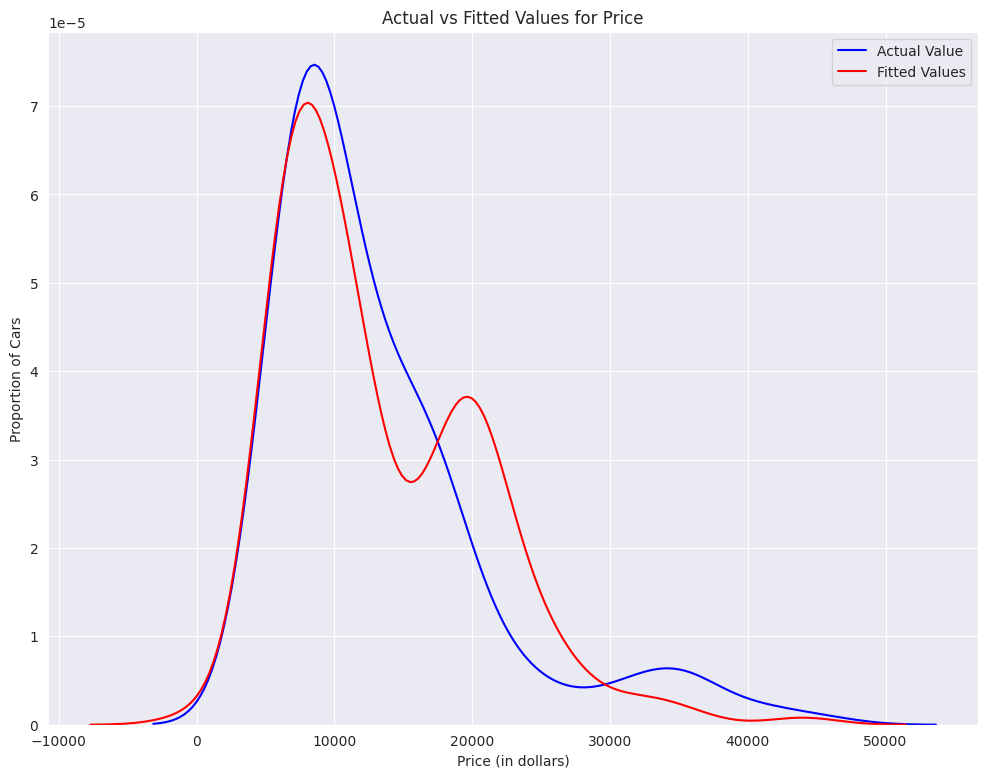

In [50]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

x_data = model_data.iloc[:, :-1]
y_data = model_data['price']

lr = LinearRegression()
score = cross_val_score(lr, x_data, y_data, cv=4)
yhat_norm = cross_val_predict(lr, x_data, y_data, cv=4)


r2 = r2_score(y_data, yhat_norm)
print('score:', score, '\n')
print('r2', r2)

plt.figure(figsize=(12, 9))
sns.kdeplot(y_data, color="b", label="Actual Value")
sns.kdeplot(yhat_norm, color="r", label="Fitted Values")


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()

plt.show()